In [1]:
import ansys.fluent.core as pyfluent

from ansys.fluent.visualization import set_config
from ansys.fluent.visualization.matplotlib import Plots
from ansys.fluent.visualization.pyvista import Graphics



In [2]:
set_config(blocking=True, set_view_on_display="isometric")

In [3]:
%matplotlib notebook

In [4]:

solver_session = pyfluent.launch_fluent(precision = "double" , processor_count= 2, mode = "solver" , show_gui = False)

In [5]:

solver_session.file.read_case_data(file_name="Static Mixer.cas.h5")

Fast-loading "C:\PROGRA~1\ANSYSI~1\ANSYS Student\v231\fluent\fluent23.1.0\\addons\afd\lib\hdfio.bin"
Done.
Multicore SMT processors detected. Processor affinity set!

Reading from Jijo_Jose:"C:\Users\Jijo Jose\Desktop\Jijo\CAD\Python-CFD\Static Mixer.cas.h5" in NODE0 mode ...
  Reading mesh ...
       23168 cells,     1 cell zone  ...
          23168 polyhedra cells,  zone id: 98
      121813 faces,     5 face zones ...
         117627 polygonal interior faces,  zone id: 97
           3878 polygonal wall faces,  zone id: 20
            102 polygonal pressure-outlet faces,  zone id: 19
            104 polygonal velocity-inlet faces,  zone id: 18
            102 polygonal velocity-inlet faces,  zone id: 17
       91870 nodes,     1 node zone  ...
  Done.


Building...
     mesh
	distributing mesh
		parts..,
		faces..,
		nodes..,
		cells..,
        bandwidth reduction using Reverse Cuthill-McKee: 11016/809 = 13.6168
     materials,
     interface,
     domains,
	mixture
     zones,
	inter

'*cx-overwrite-prompt?*'

In [6]:
graphics=Graphics(solver_session)

In [7]:
mesh=graphics.Meshes["Mesh"]

In [8]:
mesh()

{'surfaces_list': None,
 'show_edges': False,
 'show_nodes': False,
 'show_faces': True}

In [9]:
mesh.surfaces_list=["velocity_inlet_1" , "velocity_inlet_2" , "pressure_outlet" , "wall"]

In [10]:
mesh()

{'surfaces_list': ['velocity_inlet_1',
  'velocity_inlet_2',
  'pressure_outlet',
  'wall'],
 'show_edges': False,
 'show_nodes': False,
 'show_faces': True}

In [11]:
mesh.show_edges=True

C:\Users\Jijo Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


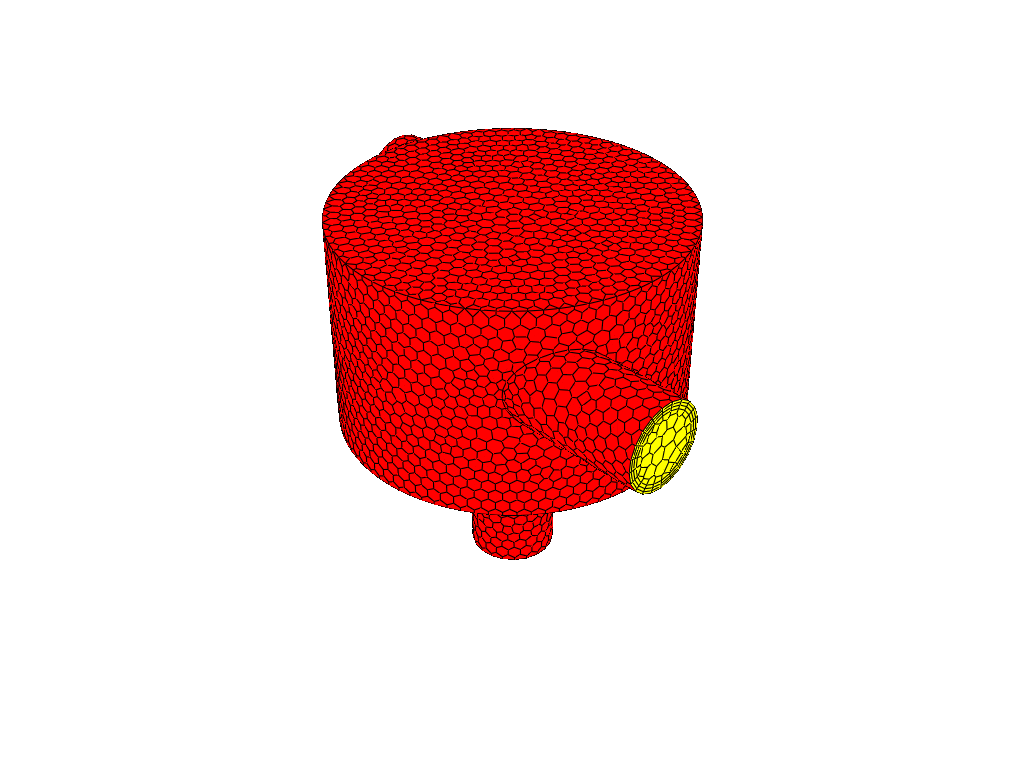

In [12]:
mesh.display()

In [13]:
mesh()

{'surfaces_list': ['velocity_inlet_1',
  'velocity_inlet_2',
  'pressure_outlet',
  'wall'],
 'show_edges': True,
 'show_nodes': False,
 'show_faces': True}

C:\Users\Jijo Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


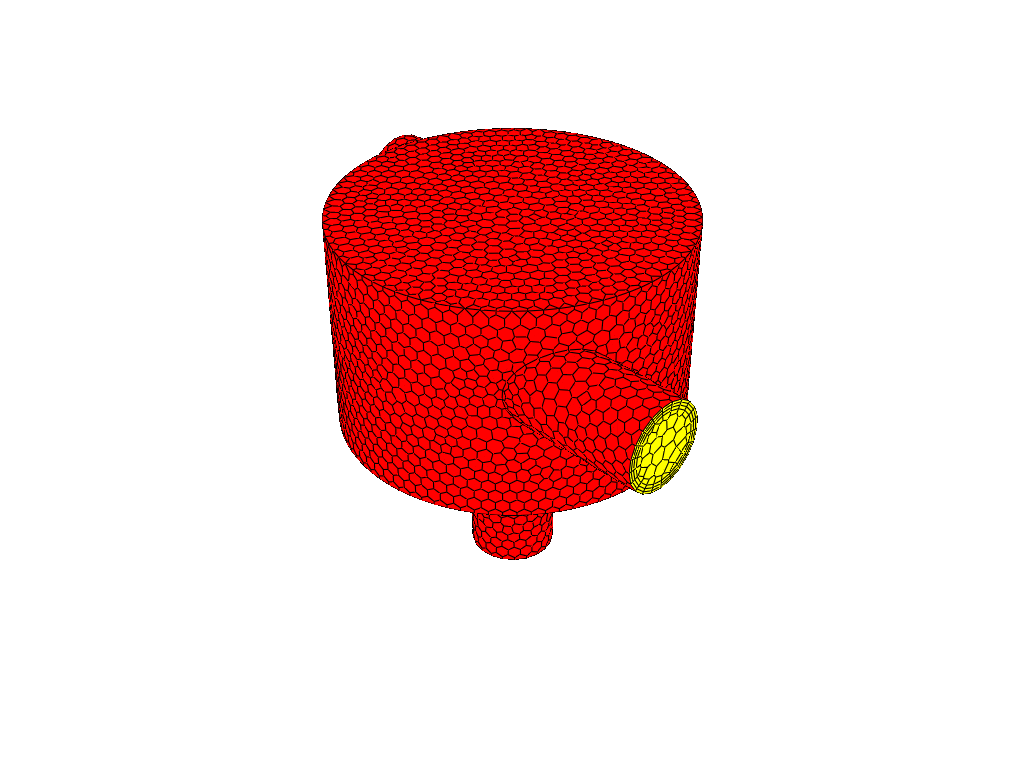

In [14]:
mesh.display()

In [16]:
plane=graphics.Surfaces["xy_plane"]

In [17]:
plane()

{'show_edges': True,
 'definition': {'type': 'iso-surface',
  'iso_surface': {'field': None, 'rendering': 'mesh', 'iso_value': None}}}

In [18]:
plane.definition.type.allowed_values


['plane-surface', 'iso-surface']

In [20]:
plane.definition.type="plane-surface"

In [21]:
plane()

{'show_edges': True,
 'definition': {'type': 'plane-surface',
  'plane_surface': {'creation_method': 'xy-plane', 'xy_plane': {'z': 0}}}}

In [23]:
plane.definition.plane_surface.xy_plane.z=0.001554

Invalid surface.


C:\Users\Jijo Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


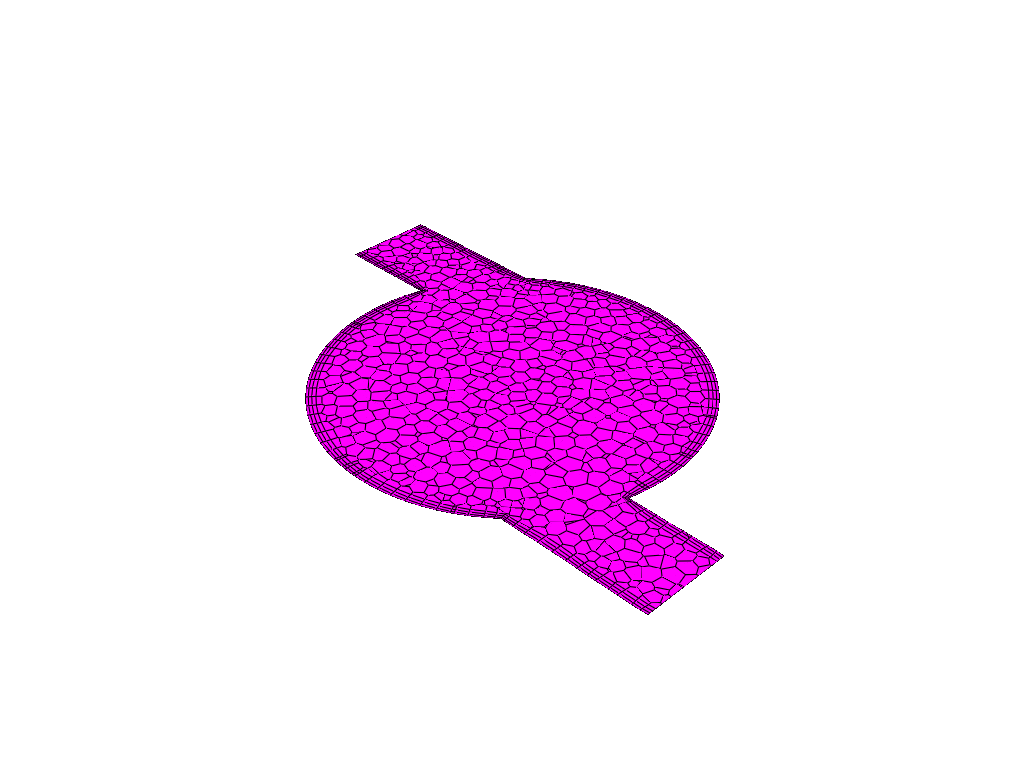

In [24]:
plane.display()

In [25]:
vc=graphics.Contours["vel-contour"]

In [26]:
vc.field = "velocity-magnitude"

In [28]:
vc.surfaces_list=["xy_plane"]

C:\Users\Jijo Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


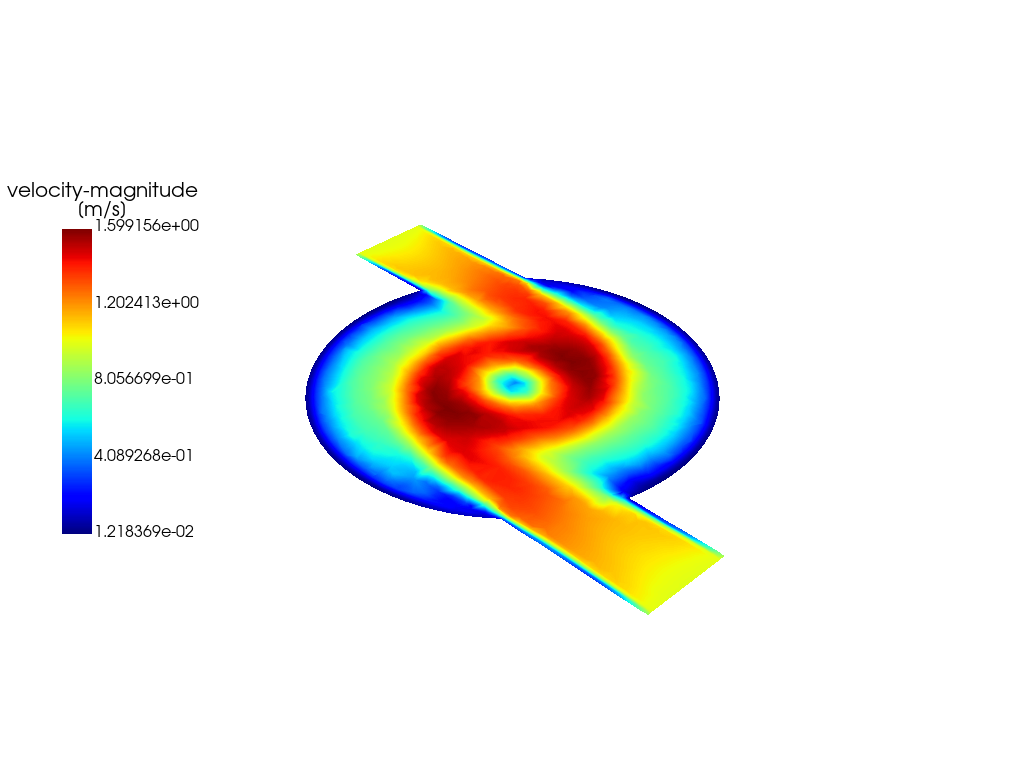

In [29]:
vc.display()

In [30]:
vector=graphics.Vectors["velocity-vector"]

In [31]:
vector.field="velocity-magnitude"
vector.surfaces_list=["xy_plane"]

C:\Users\Jijo Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


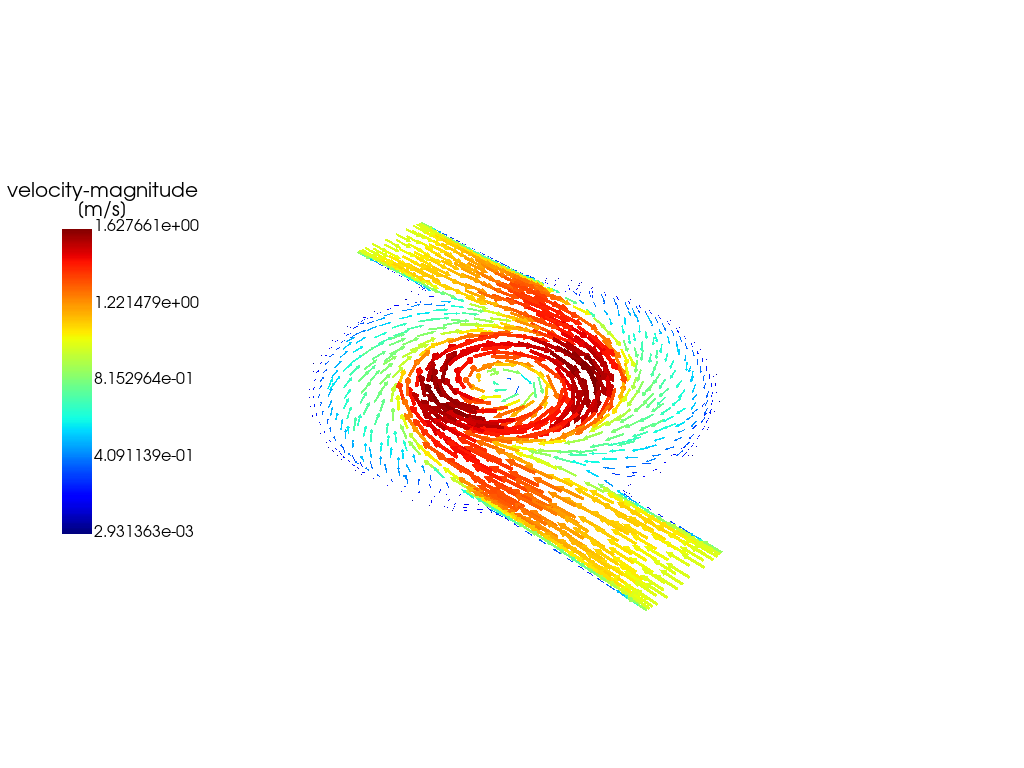

In [32]:
vector.display()

C:\Users\Jijo Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


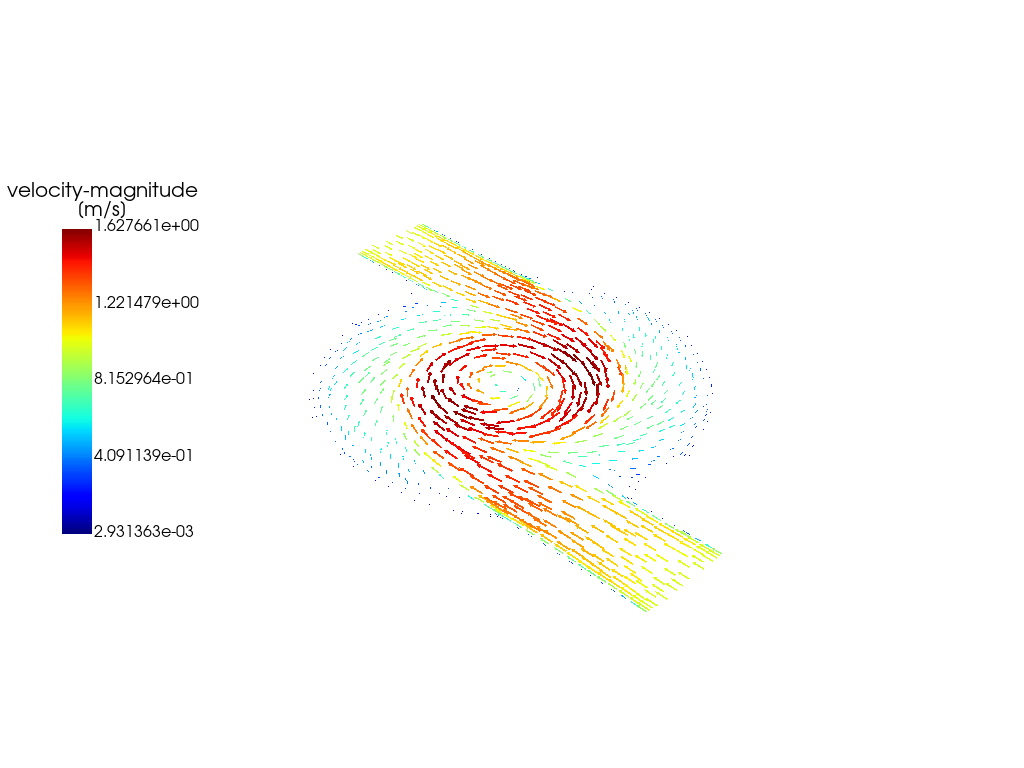

In [33]:
vector.scale=0.5
vector.display()

In [38]:
plot_session=Plots(solver_session)

In [39]:
xy_plot = plot_session.XYPlots["velocity-plot"]

In [40]:
xy_plot()

{'node_values': True,
 'boundary_values': True,
 'direction_vector': [1, 0, 0],
 'y_axis_function': None,
 'x_axis_function': 'direction-vector',
 'surfaces_list': None}

In [43]:
xy_plot.y_axis_function = "velocity-magnitude"
xy_plot.surfaces_list=["line"]
xy_plot.direction_vector=[0,1,0]

<IPython.core.display.Javascript object>


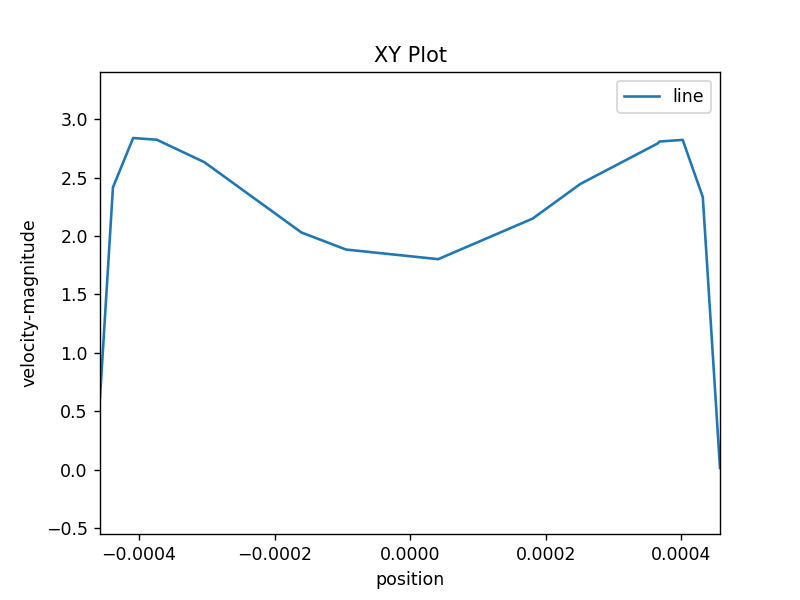

2023-08-03 00:08:09,529 matplotlib.legend WARNING  No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [45]:
xy_plot.plot()